In [83]:
from random import randrange
import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log
from scipy import stats

# Linear SVM

Linearly Separable


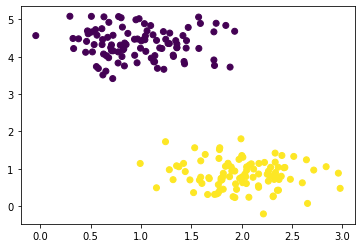

In [6]:
# load and visualize svm_data_1.csv
X = np.loadtxt('svm_data_1.csv', delimiter=',', usecols=(0,1))
Y = np.loadtxt('svm_data_1.csv', delimiter=',', usecols=(2))
plt.scatter(X[:,0], X[:,1], c=Y)
print('Linearly Separable')

Model Accuracy: 1.000000


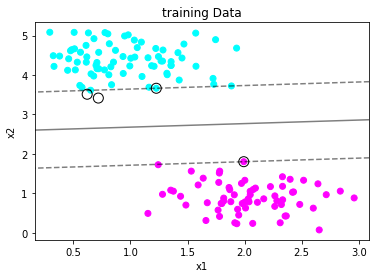

In [22]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, shuffle=True)
# Train SVC
clf = SVC(C=1E10, kernel='linear') # High C --> severely punishes errors
clf.fit(X_train, Y_train)
acc = accuracy_score(Y_val, clf.predict(X_val))
print('Model Accuracy: %f'%(acc))


# Display Plot

# Determine support Vectors
decision_function = clf.decision_function(X)
support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]

# Training Data
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap='cool')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('training Data')
plt.show()

Not Linearly Separable --> tune to polynomial kernel of degree 3


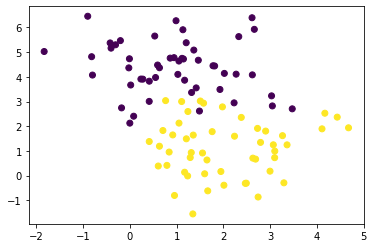

In [26]:
# Load svm_data_2.svc
X = np.loadtxt('svm_data_2.csv', delimiter=',', usecols=(0,1))
Y = np.loadtxt('svm_data_2.csv', delimiter=',', usecols=(2))
plt.scatter(X[:,0], X[:,1], c=Y)
print('Not Linearly Separable --> tune to polynomial kernel of degree 3')

Model Accuracy: 0.800000


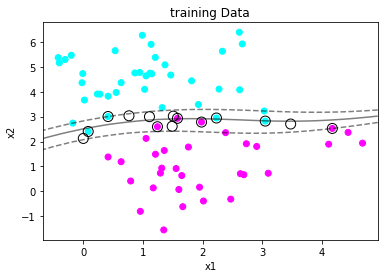

In [29]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, shuffle=True)
# Train SVC
clf = SVC(C=10, kernel='poly', degree=3) # High C --> severely punishes errors
clf.fit(X_train, Y_train)
acc = accuracy_score(Y_val, clf.predict(X_val))
print('Model Accuracy: %f'%(acc))

# Display Plot

# Determine support Vectors
decision_function = clf.decision_function(X)
support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = X[support_vector_indices]

# Training Data
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap='cool')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('training Data')
plt.show()

# Bootstrap Aggregation algorithm

### Load and preprocess data

In [30]:
# Load the dataset and store it as a pandas dataframe
dataset = pd.read_csv('sonar.all-data',header=None)
# Store features in a pandas dataframe X
X = dataset.iloc[:,:-1]
# Convert X into a numpy array
X = X.to_numpy()

# Store labels in a numpy array y
y = dataset.iloc[:,-1].to_numpy()
# Convert it into a array of boolean (True if 'M' and False otherwise)
y = (y == 'M')
# Convert it into a array of int (1 if 'True' and 0 otherwise)
y = y.astype(int)

print("Number of samples: ", X.shape[0])
print('Number of features: ', X.shape[-1])
print(X)
print(y)

Number of samples:  208
Number of features:  60
[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Subsample function


You can use the function [random.choices()](https://docs.python.org/3/library/random.html#random.choices) to get a subsampling with replacement

In [42]:
def subsample(
    X,
    y,
    n_samples=None   # number of sample in the subsampling
):
    """
    Create a random subsample from the dataset with replacement
    """
    
    X_sample = X[np.random.choice(X.shape[0],n_samples)]
    y_sample = y[np.random.choice(X.shape[0],n_samples)]
    return X_sample, y_sample

def count_ratio_unique_subsample(X_sample):
    unique_pts = len(np.unique(X_sample, axis=0))
    ratio = unique_pts/len(X)
    return ratio

# Verify approx 63.2% sample ratio of bootstrappin
foo1, _ = subsample(X, y, n_samples=len(X))
print('Ratio: %f'%(count_ratio_unique_subsample(foo1)))

Ratio: 0.625000


### Bagging train and predict functions


**Note**: in scikit-learn, all supervised estimators implement a ``fit(X, y)`` method and a ``predict(X)`` method with ``X`` being unlabeled observations and  ``y`` being labels. 

Therefore ``Classifier`` parameter can be any sklearn class implementing a supervised classifier.

(See *The problem solved in supervised learning* section in the supervised learning tutorial from [sklearn documentation](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)

In [95]:
def bagging_train(
    X_train, 
    y_train, 
    n_clfs,                                  # number of classifier
    Classifier = DecisionTreeClassifier,     # Python class of classifier
    clfs_args = {},                          # Specific python class of classifier's arguments
):
    """
    Bootstrap Aggregation training algorithm
    """
    clfs = []
    for _ in range(n_clfs):
        # -------------------------
        # Train a new classifier
        # -------------------------
        # Take a subsample of X and Y (with replacement)
        X_boot, y_boot = subsample(X_train, y_train, n_samples=len(X_train)) #TODO!
        # Initialize a new Classifier object
        clf = Classifier(**clfs_args) #TODO!
        # Train this new Classifier object
        clf.fit(X_boot, y_boot) #TODO!
        # Append your trained classifier in your list of classifiers 
        clfs.append(clf) #TODO!
    # Return the list of trained classifiers composing the bagging classifier
    return clfs


def bagging_predict(
    clfs,     # list of classifiers composing the bagging classifier
    X_test
):
    """
    Bootstrap Aggregation predict algorithm
    """
    all_preds = []
    for clf in clfs:
        all_preds.append(clf.predict(X_test))
        # print(clf.predict(X_test))
    all_preds = np.array(all_preds)
    y_pred = stats.mode(all_preds)[0][0]
    # print('\n')
    # print(y_pred)
    return y_pred


### Cross validation



You can use the [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) from sklearn to split your datasets into k folds. 

In [47]:
def KFold_split(X, y, num_folds, seed=int(666)):
    """
    Split 'X' and 'y' into k-folds with k='num_fold'
    """
    KFold_splitter = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    # Initialize lists of X (train/val) and y (train/val) for each fold
    X_train_folds = []  
    X_val_folds = []
    y_train_folds = []
    y_val_folds = []
    for (kth_fold_train_idxs, kth_fold_val_idxs) in KFold_splitter.split(X, y):
        X_train_folds.append(X[kth_fold_train_idxs])
        X_val_folds.append(X[kth_fold_val_idxs])
        y_train_folds.append(y[kth_fold_train_idxs])
        y_val_folds.append(y[kth_fold_val_idxs])
    # Return the list of k-folds datasets
    return X_train_folds, X_val_folds, y_train_folds, y_val_folds

### Bagging evaluation

In [90]:
def evaluate_bagging(
    X_train_val, 
    y_train_val, 
    num_folds, 
    n_clfs,           # number of classifier
    Classifier,       # Python class of classifier
    clfs_args = {},   # Specific python class of classifier's arguments
    seed=int(666),
):
    """
    Perform a cross validation of the bagging algorithm
    """
    # Split train and validation datasets into k folds:
    X_train_folds, X_val_folds, y_train_folds, y_val_folds = KFold_split(X_train_val, y_train_val, num_folds=num_folds, seed=seed) #TODO!
    bagging_scores = []
    bagging_clfs = []
    
    # For each set of k-folds get the bagging classifier and its accuracy
    for X_train_fold, X_val_fold, y_train_fold, y_val_fold in zip(
        X_train_folds, X_val_folds, y_train_folds, y_val_folds
        ):
        clfs = bagging_train(X_train_fold, y_train_fold, n_clfs, Classifier=Classifier, clfs_args=clfs_args) #TODO!
        y_pred = bagging_predict(clfs, X_val_fold)
        acc = accuracy_score(y_val_fold, y_pred)
        bagging_scores.append(acc)
        bagging_clfs.append(clfs)
    # Returns classifiers and validation scores of the bagging classifiers for each set of k folds
    return bagging_clfs, bagging_scores

### Test bagging on the sonar dataset


In [99]:
num_folds = 5
# Extract a test set:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=42)


# For each hyper-parameter instance, do KFold cross validation:
for n_trees in [1, 5, 10, 15, 20, 25, 30]:
    bagging_clfs, bagging_scores = evaluate_bagging(X_train_val, y_train_val, num_folds, n_trees, DecisionTreeClassifier,) #TODO!
    print('Trees: %d' % n_trees)
    print('Validation scores: ', [round(s, 3) for s in bagging_scores])
    print('Mean validation accuracy: %.3f' % (sum(bagging_scores)/len(bagging_scores)))
    # Test accuracy computed with the bagging classifier trained with the first k-fold
    test_acc = accuracy_score(
        bagging_predict(bagging_clfs[0], X_test),
        y_test,
    )
    print('Test set accuracy: %.3f' %test_acc)

Trees: 1
Validation scores:  [0.476, 0.476, 0.429, 0.714, 0.5]
Mean validation accuracy: 0.519
Test set accuracy: 0.423
Trees: 5
Validation scores:  [0.333, 0.429, 0.476, 0.524, 0.3]
Mean validation accuracy: 0.412
Test set accuracy: 0.587
Trees: 10
Validation scores:  [0.333, 0.381, 0.381, 0.381, 0.45]
Mean validation accuracy: 0.385
Test set accuracy: 0.481
Trees: 15
Validation scores:  [0.333, 0.429, 0.524, 0.524, 0.5]
Mean validation accuracy: 0.462
Test set accuracy: 0.471
Trees: 20
Validation scores:  [0.619, 0.476, 0.286, 0.524, 0.55]
Mean validation accuracy: 0.491
Test set accuracy: 0.413
Trees: 25
Validation scores:  [0.571, 0.619, 0.476, 0.381, 0.45]
Mean validation accuracy: 0.500
Test set accuracy: 0.471
Trees: 30
Validation scores:  [0.524, 0.286, 0.571, 0.381, 0.4]
Mean validation accuracy: 0.432
Test set accuracy: 0.490
